<h1 align='center'>Laboratorio de Segmentación</h1>

<h2>1. Importación de Librerías</h2>

Para simplificar el ejercicio, primero importaremos las librerías, sin necesidad de levantar un ambiente virtual e instalarlas en éste, gracias a las virtudes de Google Colaboratory como editor. Otra de las ventajas de  este intérprete de Python, es que funciona con el formato de celdas de los *Jupyter Notebooks*. Esto permite trabajar bajo el paradigma de lo que se denomina *Literate Programming*, pudiéndose hacer un claro énfasis en la estructura lógica del programa.

Para ejecutar la celda a continuación, bastará que usted la seleccione apretando sobre ella con el cursor, y luego apriete <code>shift+enter</code>




In [2]:
# Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Operational Libraries
import pandas as pd
import re

#deepcopy for dataset dictionary
import copy

#datetime for date manipulation
from datetime import datetime

<h2>2. Lectura de la Tabla de Datos</h2>

Para ejercitar, utilizaremos una tabla de datos (en adelante <i>dataset</i>) recolectados a partir de la encuesta de segmentación realizada a la salida de los locales Bimarc Food Market. Los datos no han sido procesados, por lo que hay ciertos campos que se transformarán y otros tantos que enriqueceremos en el proceso de segmentación.

Es importante notar que hay una columna numérica de identificación de los sujetos, denominada "Identificador". No se confunda, esta variable es arbitraria para todos los efectos prácticos, y no debe ser considerada para el análisis, salvo que sea considerada como llave relacional. Si usted no se encuentra familiarizado con el lenguaje y las librerías, Pandas incluye siempre un índice que comúnmente es también numérico. No confunda el índice con la columna de identificación.

In [3]:
#Importing the prospects dataset using pandas
file_path = f'dataset_clustering_propuesto.xlsx'
dataset = pd.read_excel(file_path, sheet_name=None)

In [4]:
dataset['atributos_propuesto'].dropna(how='all', axis=1, inplace=True) 
dataset['atributos_propuesto'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Atributos Base,Medidas,Descripción
1,Rut,Rol único tributario,Identificador único del cliente
2,Sexo,"Masculino, Femenino, Prefiere no Responder",Sexo con el que se identifica el cliente
3,Edad,0-99,Edad del cliente
4,Estado Civil,"Soltero/a, Conviviendo, Acuerdo de Unión Civil...",Estado civil del cliente


In [5]:
dataset['encuesta_propuesto'].head()

,Rut,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción
0,16.459.152-K,Masculino,35,Soltero/a,Educación universitaria,Trabajador dependiente,Extremadamente satisfecho
1,15.578.980-6,Masculino,38,Divorciado/a,Educación universitaria,Trabajador dependiente,Extremadamente insatisfecho
2,7.955.149-7,Femenino,60,Divorciado/a,Postgrado,Jubilado,Extremadamente satisfecho
3,17.319.841-6,Masculino,33,Soltero/a,Educación universitaria,Trabajador independiente,Extremadamente satisfecho
4,11.122.223-2,Prefiere no responder,51,Acuerdo de Unión Civil,Educación universitaria,Trabajador independiente,Extremadamente satisfecho


In [6]:
dataset['metadata_propuesto'].head()

,Cuenta,Fecha de Registro,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,16680524,2020-09-15,1188839,1,3,22,0.114,13077
1,15325842,2020-11-29,988267,1,3,74,0.133,9883
2,16653780,2020-01-10,606283,1,2,77,0.119,10307
3,13705291,2018-07-10,399077,1,2,84,0.091,5587
4,14681519,2020-03-24,556083,2,3,42,0.094,8341


<h2>3. Transformación de los Datos</h2>

A continuación procederemos a transformar los datos, creando un dataset numérico a partir del que descargamos. Si bien es más costoso en memoria el uso de réplicas completas de los datasets utilizados, esta práctica es conveniente cuando se trabaja con Jupyter Notebooks que podrían ser ejecutados en desorden o múltiples veces.

In [7]:
# Copying our dataset to avoid future issues
dataset_numerico = copy.deepcopy(dataset)
dataset_numerico_encuesta = copy.deepcopy(dataset['encuesta_propuesto'])
dataset_numerico_metadata = copy.deepcopy(dataset['metadata_propuesto'])

In [8]:
dataset_numerico_encuesta.head()

,Rut,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción
0,16.459.152-K,Masculino,35,Soltero/a,Educación universitaria,Trabajador dependiente,Extremadamente satisfecho
1,15.578.980-6,Masculino,38,Divorciado/a,Educación universitaria,Trabajador dependiente,Extremadamente insatisfecho
2,7.955.149-7,Femenino,60,Divorciado/a,Postgrado,Jubilado,Extremadamente satisfecho
3,17.319.841-6,Masculino,33,Soltero/a,Educación universitaria,Trabajador independiente,Extremadamente satisfecho
4,11.122.223-2,Prefiere no responder,51,Acuerdo de Unión Civil,Educación universitaria,Trabajador independiente,Extremadamente satisfecho


In [9]:
dataset_numerico_metadata.head()

,Cuenta,Fecha de Registro,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,16680524,2020-09-15,1188839,1,3,22,0.114,13077
1,15325842,2020-11-29,988267,1,3,74,0.133,9883
2,16653780,2020-01-10,606283,1,2,77,0.119,10307
3,13705291,2018-07-10,399077,1,2,84,0.091,5587
4,14681519,2020-03-24,556083,2,3,42,0.094,8341


Recordemos que los datos recolectados en una encuesta pueden ser de cuatro tipos principalmente:

- Nominal: nombres (identificación y clasificación)
- Ordinal: orden (jerarquización, posición relativa)
- Intervalo: cuantificación (cero arbitrario)
- Escala: cuantificación (cero absoluto)

Es importante que usted identifique el tipo de cada variable, para que así le sea más sencillo transformar los datos en información valiosa para su posterior análisis. Para efectos de este ejemplo, dividiremos la transformación de los datos por tipo para mayor claridad, transformando aquellas variables de tipo texto en numéricas según corresponda.

<h3>3.1. Valores Nominales</h3>

Las variables nominales son las siguientes en este caso: Identificador, Sexo, Nacionalidad, Comuna, Local. A continuación, haremos las transformaciones necesarias para este tipo de variables.

In [10]:
# We will create a new identifier column, that will replace the 'RUT' column, to avoid any security issues with it
identifier_mapping = {rut: i for i, rut in enumerate(dataset_numerico_encuesta['Rut'])}
dataset_numerico_encuesta['Identificador'] = dataset_numerico_encuesta['Rut'].replace(identifier_mapping)
# We will rearrange the identifier column to bring it to the front.
rearranged_columns = ['Identificador'] + [col for col in dataset_numerico_encuesta.columns if col != 'Identificador']
dataset_numerico_encuesta = dataset_numerico_encuesta[rearranged_columns]
dataset_numerico_encuesta.head()

,Identificador,Rut,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción
0,0,16.459.152-K,Masculino,35,Soltero/a,Educación universitaria,Trabajador dependiente,Extremadamente satisfecho
1,1,15.578.980-6,Masculino,38,Divorciado/a,Educación universitaria,Trabajador dependiente,Extremadamente insatisfecho
2,2,7.955.149-7,Femenino,60,Divorciado/a,Postgrado,Jubilado,Extremadamente satisfecho
3,3,17.319.841-6,Masculino,33,Soltero/a,Educación universitaria,Trabajador independiente,Extremadamente satisfecho
4,4,11.122.223-2,Prefiere no responder,51,Acuerdo de Unión Civil,Educación universitaria,Trabajador independiente,Extremadamente satisfecho


In [11]:
# For 'Sexo' column there is no real hierarchy, but it we can map it to a numeric value
mapping_sex = {'Prefiere no responder': 0, 'Femenino': 1, 'Masculino': 2}
dataset_numerico_encuesta['Sexo'] = dataset_numerico_encuesta['Sexo'].replace(mapping_sex)
dataset_numerico_encuesta.head()


,Identificador,Rut,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción
0,0,16.459.152-K,2,35,Soltero/a,Educación universitaria,Trabajador dependiente,Extremadamente satisfecho
1,1,15.578.980-6,2,38,Divorciado/a,Educación universitaria,Trabajador dependiente,Extremadamente insatisfecho
2,2,7.955.149-7,1,60,Divorciado/a,Postgrado,Jubilado,Extremadamente satisfecho
3,3,17.319.841-6,2,33,Soltero/a,Educación universitaria,Trabajador independiente,Extremadamente satisfecho
4,4,11.122.223-2,0,51,Acuerdo de Unión Civil,Educación universitaria,Trabajador independiente,Extremadamente satisfecho


In [12]:
# 'Edad' column is already numeric, so we don't need to do anything with it
# Then for the 'Estado Civi' column, we can map it to a numeric value
dataset_numerico_encuesta['Estado Civil'].unique()

array(['Soltero/a', 'Divorciado/a', 'Acuerdo de Unión Civil',
       'Separado/a', 'Casado/a', 'Soltero', 'Conviviendo', 'Viudo/a'],
      dtype=object)

In [13]:
# We see there is one option that repeats itself, 'Soltero' and 'Soltero/a', so we'll clean that
dataset_numerico_encuesta['Estado Civil'] = dataset_numerico_encuesta['Estado Civil'].replace('Soltero', 'Soltero/a')

estado_civil_mapping = {civil_state : i for i, civil_state in enumerate(dataset_numerico_encuesta['Estado Civil'].unique())}
dataset_numerico_encuesta['Estado Civil'] = dataset_numerico_encuesta['Estado Civil'].replace(estado_civil_mapping)
# estado_civil_mapping.items() = (0,1,2,3,4,5,6) as the documents suggests, only 7 different categories.
dataset_numerico_encuesta.head()

,Identificador,Rut,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción
0,0,16.459.152-K,2,35,0,Educación universitaria,Trabajador dependiente,Extremadamente satisfecho
1,1,15.578.980-6,2,38,1,Educación universitaria,Trabajador dependiente,Extremadamente insatisfecho
2,2,7.955.149-7,1,60,1,Postgrado,Jubilado,Extremadamente satisfecho
3,3,17.319.841-6,2,33,0,Educación universitaria,Trabajador independiente,Extremadamente satisfecho
4,4,11.122.223-2,0,51,2,Educación universitaria,Trabajador independiente,Extremadamente satisfecho


In [14]:
# Now, the 'Situacion Laboral' column is also nominal, so we'll map it to a numeric value
situacion_laboral_mapping = {situacion : i for i, situacion in enumerate(dataset_numerico_encuesta['Situación Laboral'].unique())}
situacion_laboral_mapping.items()
dataset_numerico_encuesta['Situación Laboral'] = dataset_numerico_encuesta['Situación Laboral'].replace(situacion_laboral_mapping)
dataset_numerico_encuesta.head()

,Identificador,Rut,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción
0,0,16.459.152-K,2,35,0,Educación universitaria,0,Extremadamente satisfecho
1,1,15.578.980-6,2,38,1,Educación universitaria,0,Extremadamente insatisfecho
2,2,7.955.149-7,1,60,1,Postgrado,1,Extremadamente satisfecho
3,3,17.319.841-6,2,33,0,Educación universitaria,2,Extremadamente satisfecho
4,4,11.122.223-2,0,51,2,Educación universitaria,2,Extremadamente satisfecho


Now, we will also transform the 'metadata_propuesto' dataset.

In [15]:
# We will create a new identifier column, that will replace the 'Cuenta' column, to avoid any security issues with it
# Because we do not want to expose their bank account information

identifier_mapping = {cuenta: i for i, cuenta in enumerate(dataset_numerico_metadata['Cuenta'])}
dataset_numerico_metadata['Identificador'] = dataset_numerico_metadata['Cuenta'].replace(identifier_mapping)
# We will rearrange the identifier column to bring it to the front.
rearranged_columns = ['Identificador'] + [col for col in dataset_numerico_metadata.columns if col != 'Identificador']
dataset_numerico_metadata = dataset_numerico_metadata[rearranged_columns]
dataset_numerico_metadata.head()

,Identificador,Cuenta,Fecha de Registro,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,0,16680524,2020-09-15,1188839,1,3,22,0.114,13077
1,1,15325842,2020-11-29,988267,1,3,74,0.133,9883
2,2,16653780,2020-01-10,606283,1,2,77,0.119,10307
3,3,13705291,2018-07-10,399077,1,2,84,0.091,5587
4,4,14681519,2020-03-24,556083,2,3,42,0.094,8341


<h3>3.2. Variables Ordinales</h3>

La única variable ordinal en este caso es el Nivel Educacional. Podríamos argumentar que el tratamiento del sexo en la celda anterior fue el que se le daría a las variables ordinales, pero lo importante para este ejemplo es la naturaleza de las variables, y no el tratamiento que le demos. Además, no se harán juicios de valor jerárquico sobre los resultados que se observen a partir de la variable sexo, como sí se lo hará con aquellos que resulten del análisis del Nivel Educacional.

In [16]:
# The column Nivel Educacional is ordered by the analyst from lower to higher
mapper_education = {'Educación primaria': 0, 'Educación secundaria': 1,
                    'Educación técnica': 2, 'Educación universitaria': 3,
                    'Postgrado': 4}

dataset_numerico_encuesta['Nivel Educacional'] = dataset_numerico_encuesta['Nivel Educacional'].replace(mapper_education)
dataset_numerico_encuesta.head()

,Identificador,Rut,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción
0,0,16.459.152-K,2,35,0,3,0,Extremadamente satisfecho
1,1,15.578.980-6,2,38,1,3,0,Extremadamente insatisfecho
2,2,7.955.149-7,1,60,1,4,1,Extremadamente satisfecho
3,3,17.319.841-6,2,33,0,3,2,Extremadamente satisfecho
4,4,11.122.223-2,0,51,2,3,2,Extremadamente satisfecho


<h3>3.3. Variables de Intervalo</h3>

Comúnmente las encuestas contendrán preguntas de tipo Likert con alternativas que buscan evaluar la opinión o satisfacción de los clientes respecto a ciertos tópicos. Este es un caso típico de variables de intervalo, y la encuesta solicitada por el Gerente de Marketing de Bimarc no es la excepción. La última pregunta realizada busca justamente medir la satisfacción con la experiencia de compra, cuestión que se codificó en escala Likert bajo la columna de Experiencia.

In [17]:
# Experiencia is a column which contains answers to a Likert scale
# This also matches our dataframe values mapping
mapper_experience = {'Extremadamente insatisfecho': 1, 'Algo insatisfecho': 2,
                     'Ni satisfecho ni insatisfecho': 3, 'Algo satisfecho': 4,
                     'Extremadamente satisfecho': 5}

dataset_numerico_encuesta['Satisfacción'] = dataset_numerico_encuesta['Satisfacción'].replace(
    mapper_experience)

dataset_numerico_encuesta.head()

,Identificador,Rut,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción
0,0,16.459.152-K,2,35,0,3,0,5
1,1,15.578.980-6,2,38,1,3,0,1
2,2,7.955.149-7,1,60,1,4,1,5
3,3,17.319.841-6,2,33,0,3,2,5
4,4,11.122.223-2,0,51,2,3,2,5


<h3>3.4. Variables de Escala</h3>

También de libro, las variables de escala suelen ser la edad y montos finitos como el consumo medido en pesos. En esta caso en particular, por representar la cantidad de días al mes que visitan el supermercado, se considerará también la frecuencia. Esta última variable es más discutible, pues su medición se puede (y suele) hacer de otras formas.

Convenientemente, como todas estas variables ya son numéricas y contínuas, no realizaremos ningún tipo de transformación a continuación.

In [18]:
# The age contained in column Edad, as well as the frequency with which our
# customer visits the supermarket in column Frecuencia, and the amount
# registered in the receipt of that visit in Consumo are all already numeric
# values and don't require further transformations

Now, we will also analyze the 'metadata_propuesto' dataset.
We can appreaciate that most of its columns are classified as scale variables, and they have numeric values, therefore there is no need to transform them. However, we will transform its 'Fecha de Registro' column, as well as create new columns that could give us valuable insight in the processing of the data.

In [19]:
dataset_numerico_metadata['Fecha de Registro'] = pd.to_datetime(dataset_numerico_metadata['Fecha de Registro'], format='%d/%m/%Y')
dataset_numerico_metadata['Año de Registro'] = dataset_numerico_metadata['Fecha de Registro'].dt.year
dataset_numerico_metadata['Mes de Registro'] = dataset_numerico_metadata['Fecha de Registro'].dt.month
dataset_numerico_metadata['Día de Registro'] = dataset_numerico_metadata['Fecha de Registro'].dt.day
dataset_numerico_metadata['Quarter de Registro'] = dataset_numerico_metadata['Fecha de Registro'].dt.quarter
dataset_numerico_metadata.head()

,Identificador,Cuenta,Fecha de Registro,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros,Año de Registro,Mes de Registro,Día de Registro,Quarter de Registro
0,0,16680524,2020-09-15,1188839,1,3,22,0.114,13077,2020,9,15,3
1,1,15325842,2020-11-29,988267,1,3,74,0.133,9883,2020,11,29,4
2,2,16653780,2020-01-10,606283,1,2,77,0.119,10307,2020,1,10,1
3,3,13705291,2018-07-10,399077,1,2,84,0.091,5587,2018,7,10,3
4,4,14681519,2020-03-24,556083,2,3,42,0.094,8341,2020,3,24,1


In [20]:
# Besides these columns, we will also calculate each account's age, in term of days, months and years

# today = datetime.now.date
dataset_numerico_metadata['Días de Antigüedad'] = (pd.Timestamp.now() - dataset_numerico_metadata['Fecha de Registro']).dt.days
dataset_numerico_metadata['Meses de Antigüedad'] = (pd.Timestamp.now() - dataset_numerico_metadata['Fecha de Registro']).dt.days // 30
dataset_numerico_metadata['Años de Antigüedad'] = (pd.Timestamp.now() - dataset_numerico_metadata['Fecha de Registro']).dt.days // 365
dataset_numerico_metadata.head()

,Identificador,Cuenta,Fecha de Registro,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros,Año de Registro,Mes de Registro,Día de Registro,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad
0,0,16680524,2020-09-15,1188839,1,3,22,0.114,13077,2020,9,15,3,1334,44,3
1,1,15325842,2020-11-29,988267,1,3,74,0.133,9883,2020,11,29,4,1259,41,3
2,2,16653780,2020-01-10,606283,1,2,77,0.119,10307,2020,1,10,1,1583,52,4
3,3,13705291,2018-07-10,399077,1,2,84,0.091,5587,2018,7,10,3,2132,71,5
4,4,14681519,2020-03-24,556083,2,3,42,0.094,8341,2020,3,24,1,1509,50,4


In [21]:
#Finally we will move all these new columns we created next to the 'Fecha de Registro' column

rearranged_columns = ['Identificador', 'Cuenta', 'Fecha de Registro', 'Día de Registro', 'Mes de Registro', 'Año de Registro', 'Quarter de Registro', 'Días de Antigüedad', 'Meses de Antigüedad', 'Años de Antigüedad'] + [col for col in dataset_numerico_metadata.columns if col not in ['Identificador', 'Cuenta', 'Fecha de Registro', 'Día de Registro', 'Mes de Registro', 'Año de Registro', 'Quarter de Registro', 'Días de Antigüedad', 'Meses de Antigüedad', 'Años de Antigüedad']]
dataset_numerico_metadata = dataset_numerico_metadata[rearranged_columns]
dataset_numerico_metadata.head()

,Identificador,Cuenta,Fecha de Registro,Día de Registro,Mes de Registro,Año de Registro,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,0,16680524,2020-09-15,15,9,2020,3,1334,44,3,1188839,1,3,22,0.114,13077
1,1,15325842,2020-11-29,29,11,2020,4,1259,41,3,988267,1,3,74,0.133,9883
2,2,16653780,2020-01-10,10,1,2020,1,1583,52,4,606283,1,2,77,0.119,10307
3,3,13705291,2018-07-10,10,7,2018,3,2132,71,5,399077,1,2,84,0.091,5587
4,4,14681519,2020-03-24,24,3,2020,1,1509,50,4,556083,2,3,42,0.094,8341


In [22]:
# Something that we will add, will be the day of the week for the registration date, and then whether the registration happened during the weekend or not
dataset_numerico_metadata['Día de la Semana'] = dataset_numerico_metadata['Fecha de Registro'].dt.dayofweek
#Note that days are mapped from 0 to 6, starting from Monday
dataset_numerico_metadata['Fin de Semana'] = dataset_numerico_metadata['Día de la Semana'].apply(lambda x: 1 if x >= 5 else 0)
#5 is Saturday, 6 is Sunday. 0 if it is a weekday, 1 if it is a weekend
dataset_numerico_metadata.head()

,Identificador,Cuenta,Fecha de Registro,Día de Registro,Mes de Registro,Año de Registro,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros,Día de la Semana,Fin de Semana
0,0,16680524,2020-09-15,15,9,2020,3,1334,44,3,1188839,1,3,22,0.114,13077,1,0
1,1,15325842,2020-11-29,29,11,2020,4,1259,41,3,988267,1,3,74,0.133,9883,6,1
2,2,16653780,2020-01-10,10,1,2020,1,1583,52,4,606283,1,2,77,0.119,10307,4,0
3,3,13705291,2018-07-10,10,7,2018,3,2132,71,5,399077,1,2,84,0.091,5587,1,0
4,4,14681519,2020-03-24,24,3,2020,1,1509,50,4,556083,2,3,42,0.094,8341,1,0


In [23]:
#Finally we will move these new columns we created next to the 'Día de Registro' column

rearranged_columns = ['Identificador', 'Cuenta', 'Fecha de Registro', 'Día de Registro', 'Día de la Semana', 'Fin de Semana'] + [col for col in dataset_numerico_metadata.columns if col not in ['Identificador', 'Cuenta', 'Fecha de Registro', 'Día de Registro', 'Día de la Semana', 'Fin de Semana']]
dataset_numerico_metadata = dataset_numerico_metadata[rearranged_columns]
dataset_numerico_metadata.head()

,Identificador,Cuenta,Fecha de Registro,Día de Registro,Día de la Semana,Fin de Semana,Mes de Registro,Año de Registro,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,0,16680524,2020-09-15,15,1,0,9,2020,3,1334,44,3,1188839,1,3,22,0.114,13077
1,1,15325842,2020-11-29,29,6,1,11,2020,4,1259,41,3,988267,1,3,74,0.133,9883
2,2,16653780,2020-01-10,10,4,0,1,2020,1,1583,52,4,606283,1,2,77,0.119,10307
3,3,13705291,2018-07-10,10,1,0,7,2018,3,2132,71,5,399077,1,2,84,0.091,5587
4,4,14681519,2020-03-24,24,1,0,3,2020,1,1509,50,4,556083,2,3,42,0.094,8341


<h2>4. Enriquecimiento de los Datos</h2>

Tras transformar los datos obtenidos a través de la encuesta, tenemos siempre la posibilidad de enriquecer la tabla cruzando la información de ésta con fuentes de terceros. En este caso, el equipo de Inteligencia de Negocios decidió cruzar la información con los metadatos disponibles en Fictual

In [24]:
# We will now merge the two datasets into one, using the 'Identificador' column as the key

dataset_enriquecido = pd.merge(dataset_numerico_encuesta, dataset_numerico_metadata, on='Identificador')
dataset_enriquecido.head()

# Finally, we will drop the columns 'Rut', 'Cuenta' and 'Fecha de Registro', as they are no longer needed
# This way, we make sure the data is fully anonimized.

dataset_enriquecido = dataset_enriquecido.drop(columns=['Rut', 'Cuenta', 'Fecha de Registro'])
dataset_enriquecido.head()

,Identificador,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción,Día de Registro,Día de la Semana,Fin de Semana,...,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,0,2,35,0,3,0,5,15,1,0,...,3,1334,44,3,1188839,1,3,22,0.114,13077
1,1,2,38,1,3,0,1,29,6,1,...,4,1259,41,3,988267,1,3,74,0.133,9883
2,2,1,60,1,4,1,5,10,4,0,...,1,1583,52,4,606283,1,2,77,0.119,10307
3,3,2,33,0,3,2,5,10,1,0,...,3,2132,71,5,399077,1,2,84,0.091,5587
4,4,0,51,2,3,2,5,24,1,0,...,1,1509,50,4,556083,2,3,42,0.094,8341


<h2>5. Revisión Primaria de la Tabla</h2>

A continuación, revisaremos los tipos de variables obtenidos, corrigiendo aquellos que pudieran dar lugar a problemas. También presentaremos su estadística descriptiva y si acaso existen valores anómalos. Finalmente, estudiaremos la relación entre los pares de variables mediante una matriz de pares o pairplot, para ver variables tentativas para segmentar.

<h3>5.1. Tipos de Variables</h3>

Previo a la revisión de los tipos de variables, copiaremos también el dataset, de tal forma que se pueda hacer luego una auditoria forense de los datos. Como se explicó previamente, en casos en que las tablas son muy grandes esto podría ser contraproducente, pero por lo general es preferible en tablas pequeñas trabajar con copias, antes de modificar sus datos.

In [25]:
dataset_corregido = dataset_enriquecido.copy(deep=True)
print(dataset_corregido.dtypes)

Identificador            int64
Sexo                    object
Edad                     int64
Estado Civil             int64
Nivel Educacional        int64
Situación Laboral        int64
Satisfacción             int64
Día de Registro          int32
Día de la Semana         int32
Fin de Semana            int64
Mes de Registro          int32
Año de Registro          int32
Quarter de Registro      int32
Días de Antigüedad      int64
Meses de Antigüedad      int64
Años de Antigüedad       int64
Monto Invertido          int64
Cambios de Cartera       int64
Visitas al Sitio         int64
Aversión al Riesgo       int64
Rentabilidad           float64
Retiros                  int64
dtype: object


Observemos que todas las variables son de tipo numérico, excepto por Sexo, que es de tipo object.

<h3>5.2. Corrección de Valores</h3>

En algunos casos, la siguiente celda podría contener excepciones para no incluir en la estadística descriptiva variables que por su naturaleza no puedan o deban ser interpretadas de forma numérica. En esta ocación, bastará transformar el tipo de la columna Nivel Educacional a numérico. La función para transformar los datos se dejó abierta, de tal forma que usted la pueda utilizar para la tarea.

In [26]:
# Setting columns as numeric
dataset_corregido['Sexo'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Prefiere no Responder'

We notice how when we mapped the numeric values for the 'Sexo' column, we didn't include the parsing case 'Prefiere no Responder', so we will do it now.

In [27]:
# We will include the case where 'Sexo' is 'Prefiere no Responder' instead of 'Prefiere no responder'. We will give them the same value

dataset_corregido['Sexo'] = dataset_corregido['Sexo'].replace('Prefiere no Responder', 0)
dataset_corregido['Sexo'].astype('int64')
print(dataset_corregido.dtypes)



Identificador            int64
Sexo                     int64
Edad                     int64
Estado Civil             int64
Nivel Educacional        int64
Situación Laboral        int64
Satisfacción             int64
Día de Registro          int32
Día de la Semana         int32
Fin de Semana            int64
Mes de Registro          int32
Año de Registro          int32
Quarter de Registro      int32
Días de Antigüedad      int64
Meses de Antigüedad      int64
Años de Antigüedad       int64
Monto Invertido          int64
Cambios de Cartera       int64
Visitas al Sitio         int64
Aversión al Riesgo       int64
Rentabilidad           float64
Retiros                  int64
dtype: object


In [28]:
dataset_corregido.head()

,Identificador,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción,Día de Registro,Día de la Semana,Fin de Semana,...,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,0,2,35,0,3,0,5,15,1,0,...,3,1334,44,3,1188839,1,3,22,0.114,13077
1,1,2,38,1,3,0,1,29,6,1,...,4,1259,41,3,988267,1,3,74,0.133,9883
2,2,1,60,1,4,1,5,10,4,0,...,1,1583,52,4,606283,1,2,77,0.119,10307
3,3,2,33,0,3,2,5,10,1,0,...,3,2132,71,5,399077,1,2,84,0.091,5587
4,4,0,51,2,3,2,5,24,1,0,...,1,1509,50,4,556083,2,3,42,0.094,8341


In [29]:
dataset_corregido

,Identificador,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción,Día de Registro,Día de la Semana,Fin de Semana,...,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,0,2,35,0,3,0,5,15,1,0,...,3,1334,44,3,1188839,1,3,22,0.114,13077
1,1,2,38,1,3,0,1,29,6,1,...,4,1259,41,3,988267,1,3,74,0.133,9883
2,2,1,60,1,4,1,5,10,4,0,...,1,1583,52,4,606283,1,2,77,0.119,10307
3,3,2,33,0,3,2,5,10,1,0,...,3,2132,71,5,399077,1,2,84,0.091,5587
4,4,0,51,2,3,2,5,24,1,0,...,1,1509,50,4,556083,2,3,42,0.094,8341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,176,2,28,0,3,0,4,21,5,1,...,3,1694,56,4,4120015,64,66,72,0.139,243081
177,177,1,50,3,3,2,4,20,4,0,...,3,1695,56,4,3528756,61,67,58,0.075,112920
178,178,2,57,2,3,0,4,21,1,0,...,1,1572,52,4,3860186,53,57,45,0.158,243192
179,179,1,35,0,3,2,4,8,1,0,...,4,1250,41,3,3398619,33,35,54,0.068,176728


Arreglamos el problema de tipos de la columna, ahora todas las columnas poseen formatos numéricos.

In [30]:
dataset_corregido.describe()

,Identificador,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción,Día de Registro,Día de la Semana,Fin de Semana,...,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,1.810000e+02,181.000000,181.000000,181.000000,181.00000,181.000000
mean,90.000000,1.375691,43.447514,2.287293,3.022099,1.436464,4.182320,16.254144,2.756906,0.259669,...,2.464088,1158.712707,38.138122,2.674033,2.289449e+06,11.839779,31.093923,72.176796,0.11158,125586.723757
std,52.394338,0.607605,10.035147,2.112214,0.482537,1.216825,0.985967,9.271914,1.925420,0.439669,...,1.072423,500.275241,16.697563,1.425498,1.123746e+06,18.463230,20.367922,26.987275,0.02433,94791.167594
min,0.000000,0.000000,27.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,230.000000,7.000000,0.000000,2.002700e+05,0.000000,2.000000,4.000000,0.06800,2410.000000
25%,45.000000,1.000000,35.000000,0.000000,3.000000,0.000000,4.000000,8.000000,1.000000,0.000000,...,2.000000,815.000000,27.000000,2.000000,1.424797e+06,2.000000,11.000000,50.000000,0.10100,39765.000000
50%,90.000000,1.000000,44.000000,2.000000,3.000000,2.000000,4.000000,16.000000,3.000000,0.000000,...,2.000000,1116.000000,37.000000,3.000000,2.234948e+06,4.000000,35.000000,90.000000,0.11000,117396.000000
75%,135.000000,2.000000,52.000000,4.000000,3.000000,2.000000,5.000000,25.000000,5.000000,1.000000,...,3.000000,1537.000000,51.000000,4.000000,3.207040e+06,12.000000,43.000000,95.000000,0.11800,195419.000000
max,180.000000,2.000000,60.000000,6.000000,4.000000,4.000000,5.000000,31.000000,6.000000,1.000000,...,4.000000,2228.000000,74.000000,6.000000,5.392160e+06,109.000000,116.000000,100.000000,0.23500,399317.000000


Otro aspecto clave a considerar, es la heterogénea distribución de la media y la varianza de las variables observadas. Esto podría dar lugar a problemas más adelante y, por lo general, se recomienda normalizar los datos para facilitar su trabajo.

<h2>6. Visualización de los Datos</h2>

Para visualizar los datos, lo más que podemos hacer es hacerlo en tres dimensiones. Ya analizamos la estadística descriptiva, que podría ser interpretada como la visualización en una dimensión. A continuación, haremos lo propio para las dimensiones que faltan.

<h3>6.1. Visualización de dos Dimensiones</h3>

Primero, y mediante la función <code>pairplot</code> de la librería seaborn, observaremos la estructura de los datos y sus relaciones entre pares. Con ello, podemos determinar visualmente qué variables presentan un mayor potencial para generar grupos distintos entre sí.

Pese a la advertencia acerca de la magnitud de los valores que toman nuestras variables, en el caso del pairplot esto no afectará la interpretación, ya que la escala de los ejes controla por este problema. No se preocupe si la ejecución de esta celda toma varios minutos, es normal y sólo debe esperar.

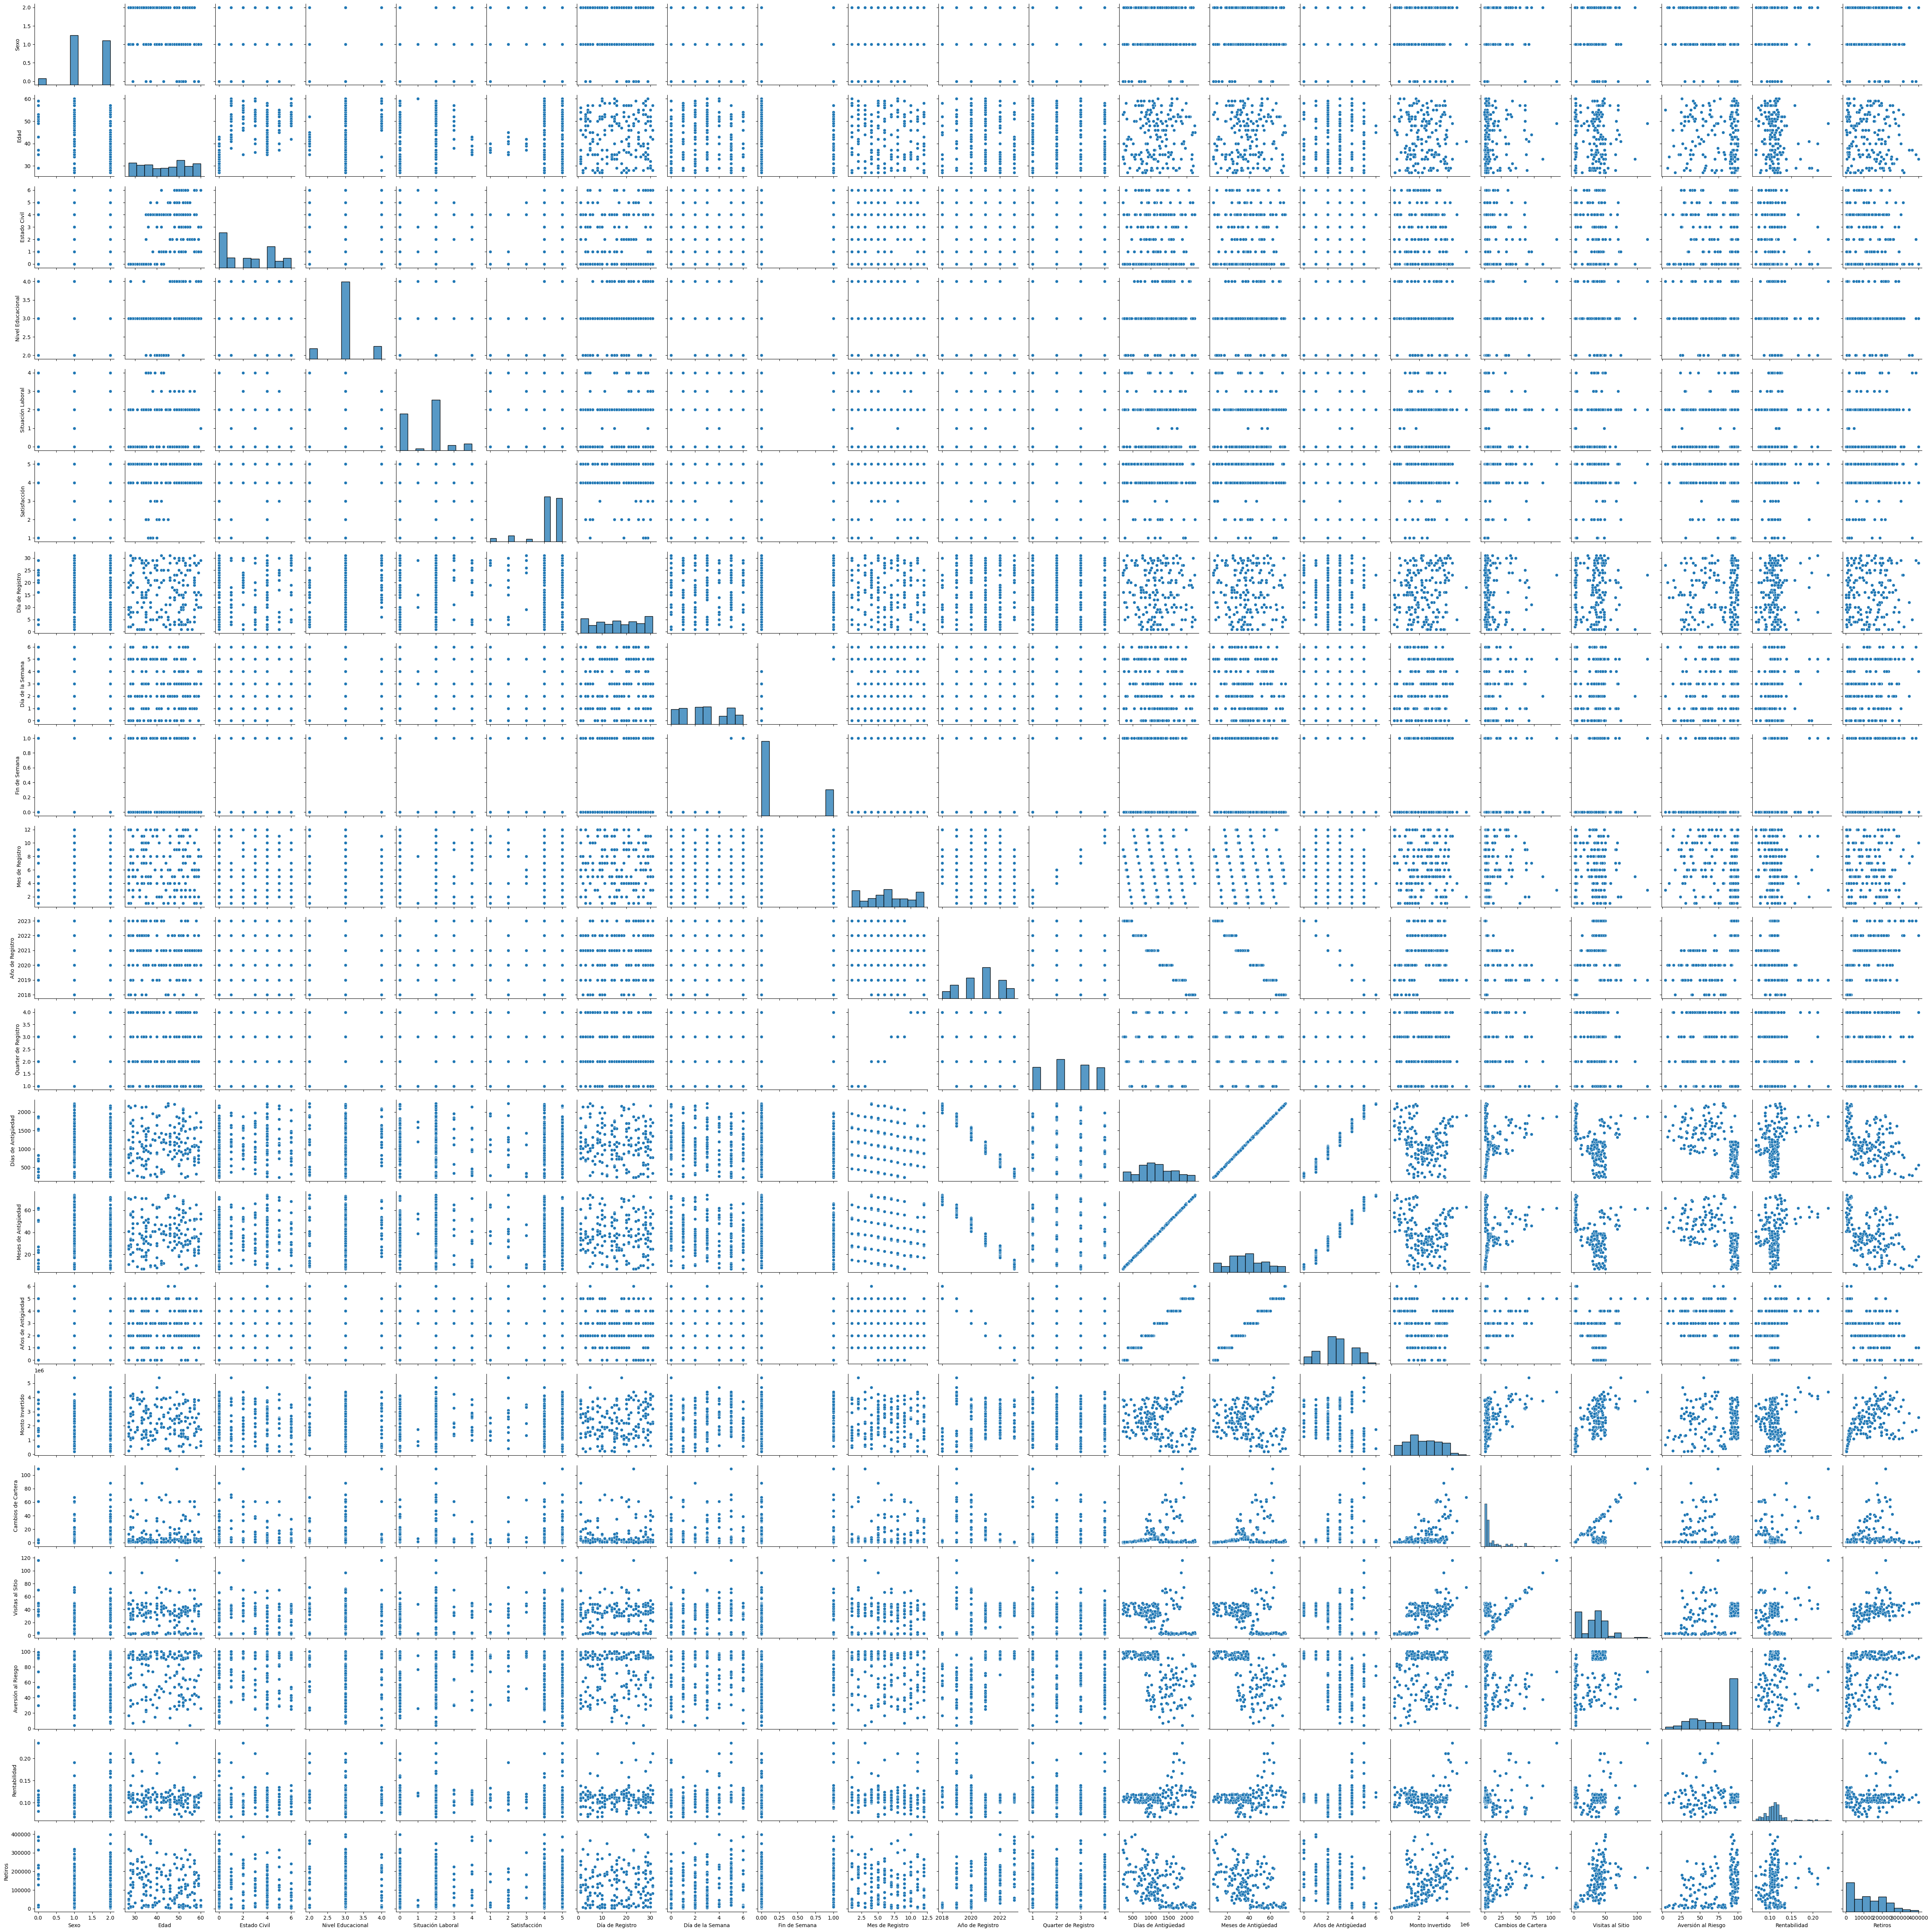

In [31]:
# Excluding spurious variables from our columns' dataset
cols = [col for col in dataset_corregido.columns if col != 'Identificador']

# Plot pairwise relationships in our dataset
pairwise_plot = sns.pairplot(dataset_corregido[cols])

La mayoría de los gráficos generados corresponde a nubes de puntos sin mayor interpretación posible. Otros tantos son gráficos de variables booleanas o con muy pocas alternativas como para detectar patrones claros.

Sin embargo, sí hay ciertas variables que al interactuar una con la otra se dividen en grupos o marcan tendencias. Ejemplos de ello son la edad con el consumo, la pobreza de la comuna con el consumo y la frecuencia de compra con el consumo. No tomaremos en cuenta la comuna, pues esta variable nos sirvió de llave para medir la pobreza, y por lo tanto nuestro análisis se centrará la variable que derivamos.

<h3>6.2. Visualización en Tres Dimensiones</h3>

Evidentemente, el consumo será una variable que analizaremos. La edad no es tan atractiva, pues reconocemos dos grandes grupos, pero dentro de cada uno la edad es indistinta. La pobreza y la frecuencia sí serán variables atractivas y, si graficamos, podremos observar que efectivamente se crean grupos dentro de la muestra.



In [89]:
# Visualize up to three variables using a 3d scatter plot with plotly
fig = px.scatter_3d(dataset_corregido, x='Monto Invertido', y='Aversión al Riesgo',
                    z='Rentabilidad')

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Identificador', 'Sexo', 'Edad', 'Estado Civil', 'Nivel Educacional', 'Situación Laboral', 'Satisfacción', 'Día de Registro', 'Día de la Semana', 'Fin de Semana', 'Mes de Registro', 'Año de Registro', 'Quarter de Registro', 'Días de Antigüedad', 'Meses de Antigüedad', 'Años de Antigüedad', 'Monto Invertido', 'Cambios de Cartera', 'Visitas al Sitio', 'Aversión al Riesgo', 'Rentabilidad', 'Retiros'] but received: Días de Antigüedad

Con los análisis anteriormente realizados, y si etiquetamos y revisamos exhaustivamente cada uno de los grupos, podríamos dar con una buena segmentación a priori.

No obstante, esto sólo nos servirá para identificar el número de segmentos hasta las tres dimensiones. Para segmentos cuyas variables críticas sean más de tres, tendremos que utilizar métodos estadísticos más complejos, como los que veremos a continuación.

<h2>7. Algoritmos de Segmentación Jerárquica</h2>

Se denomina segmentación jerárquica a aquella cuyos grupos que comparten una raíz común en la muestra, separándose gradualmente y en forma interconectada en diferentes ramas. A continuación, importaremos las librerías específicas para realizar estas operaciones.

In [56]:
# Clustering Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<h3>7.1. Normalización, Depuración y Dendogramas</h3>

Normalmente, este ejercicio se inicia con la construcción de una gráfica denominada dendograma. En este caso, aplicaremos el método de mínima varianza de Ward para minimizar la varianza entre los clústers.

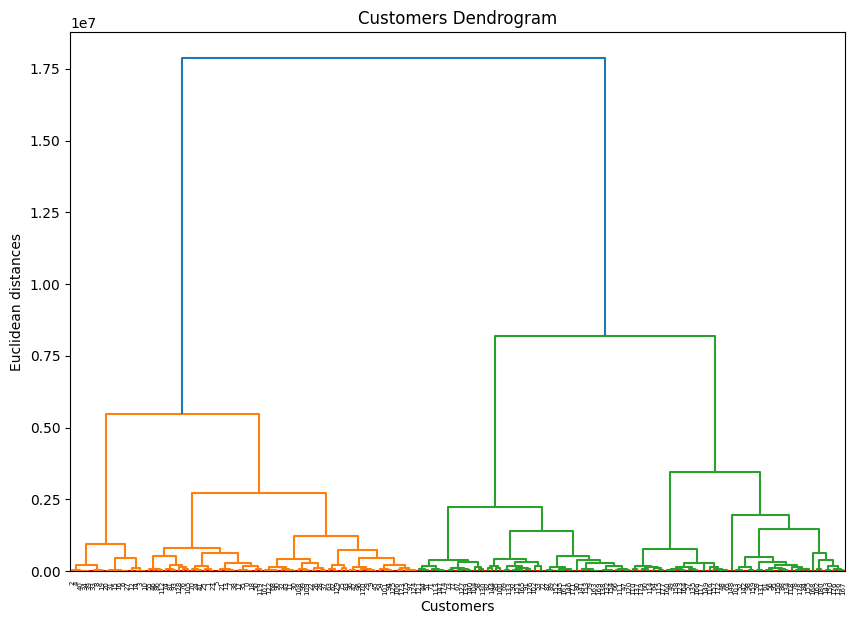

In [57]:
# Preparing our plot
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")
plt.ylabel('Euclidean distances')
plt.xlabel('Customers')

# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Identificador']
filtered_cols = [col for col in dataset_corregido.columns
                 if col not in excluded_cols]

selected_data = dataset_corregido[filtered_cols].copy(deep=True) #[['Consumo', 'Frecuencia', 'Pobreza de la Comuna']]

clusters = sch.linkage(selected_data, method='ward', metric="euclidean")

# Aproximation to the number of clusters
plt.axhline(y = 500, color = 'r', linestyle = '-')

# Creating and showing our dendogram
sch.dendrogram(Z=clusters)
plt.show()

Para determinar la cantidad de clústers, observaremos las distancias euclidianas, buscando el punto en que ellas son más largas, para luego trazar una línea horizontal aproximadamente por la mitad, en lo que se denomina "el método de Thorndike". La cantidad de verticales que atraviese es considerada una buena aproximación a la cantidad de clústers que tendremos en nuestra muestra [(Thorndike, 1953)](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.177.7605).

Dada la segmentación a priori, sabemos que contamos con al menos tres segmentos. Aplicando el método de Thorndike, tendríamos que concluir que en la muestra se observan dos segmentos. Sin embargo, y como mencionamos previamente, sabemos que en nuestra muestra hay variables cuya magnitud podría estar afectando nuestros análisis. Una forma de controlar por ello es normalizando los datos, cuestión que haremos a continuación.

In [58]:
dataset_normalized = dataset_corregido.copy(deep=True)

# Normalize each column of the dataset
for column in dataset_normalized.columns:
    # Check if column is numeric
    if dataset_normalized[column].dtype == 'object':
        continue

    # Normalize column
    dataset_normalized[column] = (dataset_normalized[column] - dataset_normalized[column].min()) / \
                                  (dataset_normalized[column].max() - dataset_normalized[column].min())

    # Transform NA values to zero
    dataset_normalized[column] = dataset_normalized[column].fillna(0)

    # Multiply by 100 to get a percentage and transform to int
    dataset_normalized[column] = (dataset_normalized[column] * 100).astype(int)

Tenga en cuenta, que para ejecutar el algoritmo que genera el dendograma, fue necesario transformar los valores normalizados de números decimales a enteros, multiplicando por 100 y forzando las columnas a tipo entero. Así, habiendo normalizado y transformado los datos, podemos analizar nuevamente el dendograma y evaluar si se corrigieron o no los problemas.

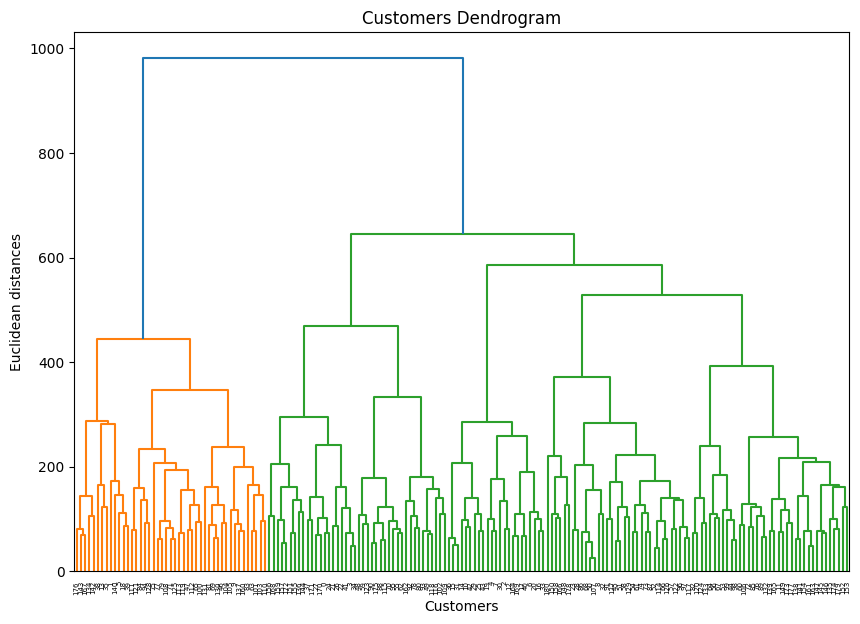

In [59]:
# Preparing our plot
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")
plt.ylabel('Euclidean distances')
plt.xlabel('Customers')

# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Identificador']
filtered_cols = [col for col in dataset_normalized.columns
                 if col not in excluded_cols]

selected_data = dataset_normalized[filtered_cols].copy(deep=True)
clusters = sch.linkage(selected_data, method='ward', metric="euclidean")

# Creating and showing our dendogram
sch.dendrogram(Z=clusters)
plt.show()

Lamentablemente, aún cuando normalizamos los datos, el dendograma sigue sin arrojar un resultado correcto. Esta vez, el problema se debe a la presencia de variables espúreas, ya que no contribuyen más que sólo ruido. Así, y con el afán de depurar nuestra base, reduciremos el caso a las variables que presentan los patrones más notorios en nuestro pairplot:

In [61]:
dataset_corregido.head(3)

,Identificador,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción,Día de Registro,Día de la Semana,Fin de Semana,...,Quarter de Registro,Días de Antigüedad,Meses de Antigüedad,Años de Antigüedad,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
0,0,2,35,0,3,0,5,15,1,0,...,3,1334,44,3,1188839,1,3,22,0.114,13077
1,1,2,38,1,3,0,1,29,6,1,...,4,1259,41,3,988267,1,3,74,0.133,9883
2,2,1,60,1,4,1,5,10,4,0,...,1,1583,52,4,606283,1,2,77,0.119,10307


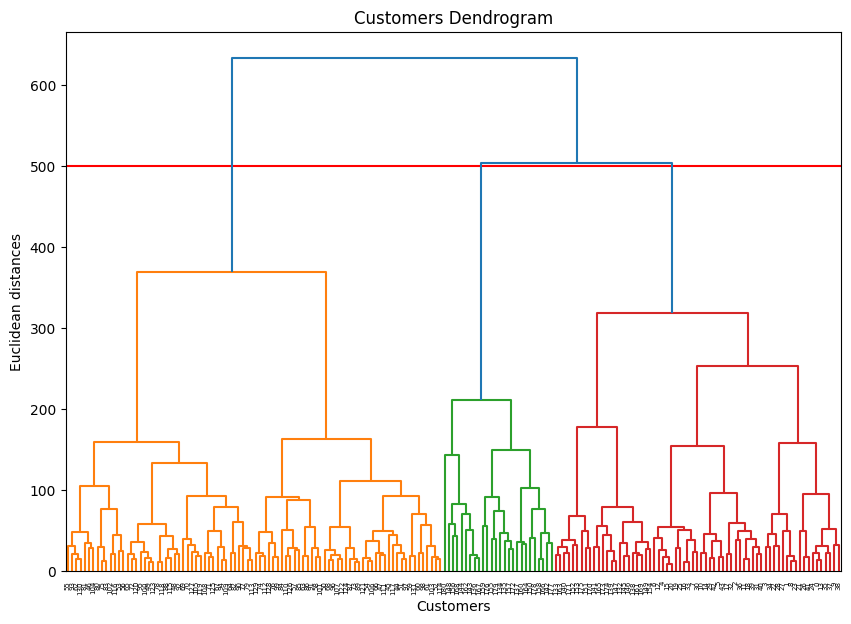

In [80]:
# Preparing our plot
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")
plt.ylabel('Euclidean distances')
plt.xlabel('Customers')

# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Identificador', 'Estado Civil', 'Situación Laboral', 'Satisfacción', 'Nivel Educacional',
                 'Día de la Semana', 'Fin de Semana', 'Día de Registro', 'Mes de Registro', 'Año de Registro',
                 'Quarter de Registro', 'Meses de Antigüedad', 'Años de Antigüedad', 'Sexo']

filtered_cols = [col for col in dataset_normalized.columns
                 if col not in excluded_cols]

selected_data = dataset_normalized[filtered_cols].copy(deep=True)
selected_data.head(3)

clusters = sch.linkage(selected_data, method='ward', metric="euclidean")

# Aproximation to the number of clusters
plt.axhline(y = 500, color = 'r', linestyle = '-')

# Creating and showing our dendogram
sch.dendrogram(Z=clusters)
plt.show()

<h3>7.2. Visualización de los Segmentos Creados</h3>

Existen dos algoritmos para clusterizar en forma jerárquica: los aglomerativos y los divisivos. En este ejercicio utilizaremos una estrategia aglomerativa, donde cada observación comienza en su propio grupo, y los pares de grupos son mezclados mientras uno sube en la jerarquía, en forma ascendente.

No obstante, y tanto para la determinación del número de grupos por medio del dendograma como para la clasificación de los individuos de nuestra muestra, se recomienda hacer uso de diferentes vínculos y métricas, y observar los resultados generados con una perspectiva de negocios [(Sampaio, 2022)](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/).

Text(0.5, 1.0, 'Labeled Customer Data')

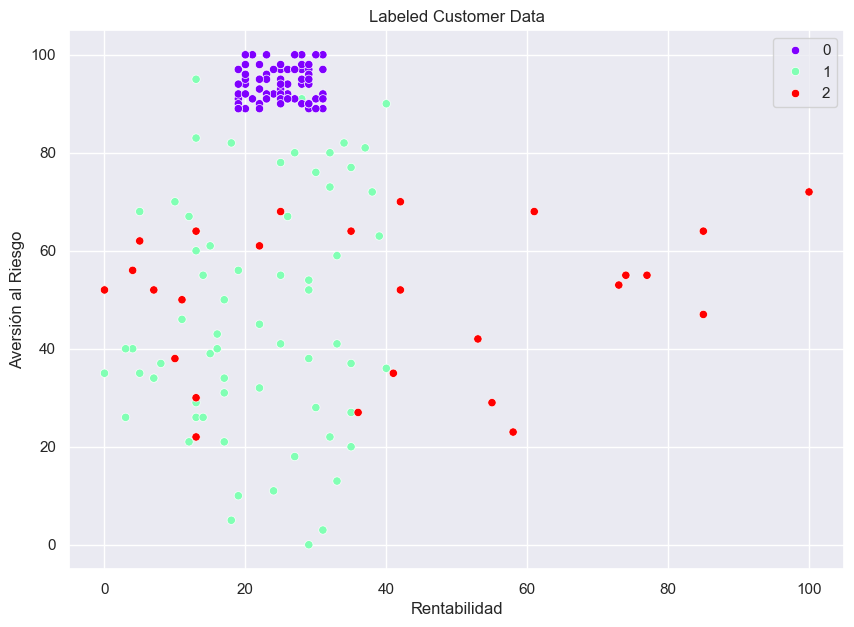

In [95]:
# Divisive Hierarchical Clustering using the euclidean distance and ward method
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean',
                                           linkage='ward')
clustering_model.fit(selected_data)

# Accessing vars of the clustering object
data_labels_v1 = clustering_model.labels_

# Visualization of our graph
sns.set(rc={'figure.figsize':(10, 7)})
# Días de Antigüedad
sns.scatterplot(x='Rentabilidad', y='Aversión al Riesgo', data=selected_data,
                palette="rainbow", hue=data_labels_v1)\
                .set_title('Labeled Customer Data')

<h3>7.3. Asignación de los Segmentos a la Muestra</h3>

Por último, agregamos una columna a nuestro dataset, cuyo contenido viene dado por las operaciones previas y permite asignar el grupo correcto a cada individuo..

In [24]:
# Copying our dataset to avoid future issues
dataset_segmented_v1 = dataset_corregido.copy(deep=True)

# Adding clusters and reverting values from numeric
segments = [f'cluster_{group + 1:02d}' for group in data_labels_v1]
dataset_segmented_v1.insert(loc=1, column='segment', value=segments)

dict_mappers = {'Sexo': mapper_sex, 'Nacionalidad': mapper_nationality,
                'Nivel Educacional': mapper_education,
                'Ubicación': mapper_ubicacion, 'Comuna': mapper_city,
                'Local': mapper_local, 'Experiencia': mapper_experience}

for col, mapper in dict_mappers.items():
  mapper_inv = {v: k for k, v in mapper.items()}
  dataset_segmented_v1[col] = dataset_segmented_v1[col].replace(mapper_inv)

dataset_segmented_v1.sort_values(by=['segment', 'Identificador'], inplace=True)
dataset_segmented_v1

,Identificador,segment,Sexo,Edad,Nacionalidad,Nivel Educacional,Ubicación,Comuna,Pobreza de la Comuna,Local,Frecuencia,Consumo,Experiencia
1,2,cluster_01,Masculino,43,Chilena,Educación universitaria,Nororiente,Las Condes,0.048,Manquehue Norte,18,488729,Ni satisfecho ni insatisfecho
8,9,cluster_01,Masculino,47,Peruana,Educación universitaria,Centro,Santiago,0.116,La Florida,18,463002,Algo insatisfecho
10,11,cluster_01,Masculino,32,Chilena,Educación universitaria,Nororiente,Las Condes,0.048,Manquehue Norte,15,328849,Ni satisfecho ni insatisfecho
15,16,cluster_01,Masculino,50,Chilena,Educación universitaria,Centro,Santiago,0.116,La Florida,13,365240,Algo insatisfecho
17,18,cluster_01,Masculino,46,Peruana,Educación técnica,Sur,San Miguel,0.116,La Florida,12,469699,Algo satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,165,cluster_03,Masculino,30,Chilena,Educación técnica,Nororiente,Vitacura,0.046,Manquehue Norte,6,26942,Extremadamente satisfecho
194,168,cluster_03,Prefiere no Responder,36,Chilena,Educación universitaria,Nororiente,Vitacura,0.046,Manquehue Norte,1,25017,Extremadamente satisfecho
195,178,cluster_03,Masculino,40,Chilena,Educación universitaria,Nororiente,Providencia,0.098,Manquehue Norte,6,19733,Extremadamente insatisfecho
196,187,cluster_03,Femenino,34,Peruana,Postgrado,Nororiente,Lo Barnechea,0.028,Manquehue Norte,6,26222,Extremadamente insatisfecho


<h2>8. Algoritmos de Segmentación No-Jerárquica</h2>

La segmentación no jerárquica implica la formación de grupos fusionando o dividiendo los clústers en forma no ramificada. Estas técnicas agrupan los datos para maximizar o minimizar algunos criterios de evaluación. K-Means es un algoritmo simple de *machine learning* de tipo no-supervisado que agrupa los datos en un número específico (k) de grupos.

In [25]:
# Clustering Libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

<h3>8.1. Definición de la cantidad de Clústers</h3>

A continuación, filtraremos la mínima cantidad de variables con las que podemos correr el método del "codo" para definir la cantidad de segmentos a crear. Al igual que en el método jerárquico, seguramente necesitemos normalizar y omitir una serie de variables para que nuestro modelo sea parsimonioso.

De todas formas, es útil observar el proceso completo y ver cómo aplica en la práctica el concepto de que si entran datos de mala calidad a un modelo, los resultados de éste también serán de mala calidad. A este concepto se lo conoce por la sigla GIGO (Garbage In, Garbage Out) y se le atribuye a George Fuechsel (2004).

In [26]:
# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Identificador']
cols = [col for col in dataset_corregido.columns if col not in excluded_cols]
base_data = dataset_corregido[cols].copy(deep=True)

Filtrados ya los datos, crearemos una función que calcula el algoritmo de k-medias en un loop entre 2 y 11 clústers, para así determinar el óptimo observando la suma del cuadrado de las distancias entre grupos (WCSS, por sus siglas en inglés):

\begin{align}
WCSS = \sum_{i\in n} (X_i-Y_i)^2
\end{align}

A continuación, haremos el ejercicio manualmente en un *for loop*:

In [27]:
def manual_elbow(selected_data):
  # Storing processed information and models
  df_kmeans = pd.DataFrame(columns=['clusters', 'wcss'])
  dict_kmeans = {}

  for i in range(1, 11):
    df_kmeans.loc[i, 'clusters'] = i

    # Definition of our k-means model and fitting our model
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                    n_init=10, random_state=0)

    y_kmeans = kmeans.fit(selected_data)

    # Sum of squared distances to the closest cluster center
    df_kmeans.loc[i, 'wcss'] = kmeans.inertia_

    # Storing all variables for our specific
    dict_kmeans[i] = y_kmeans

  return {'df': df_kmeans, 'dict': dict_kmeans}

El número óptimo de clústers se define visualmente, observando el punto donde la pendiente de la curva se suaviza. El nombre del método viene dado imaginando que la curva fuera un brazo apoyado sobre una superficie, donde el punto de inflexión sería el codo.

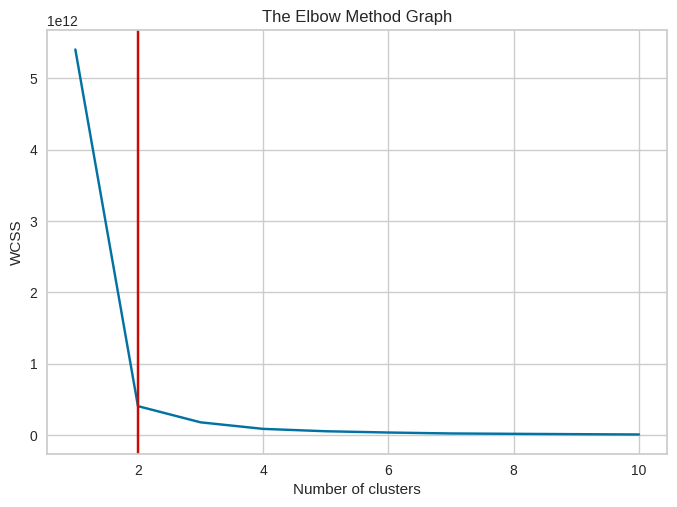

In [28]:
kmeans_base = manual_elbow(base_data)

# Plot the elbow graph
plt.plot(kmeans_base['df'].index.to_list(), kmeans_base['df']['wcss'].to_list())
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Visual proximation to the number of clusters
plt.axvline(x=2, color='r', linestyle='-')

# Plotting
plt.show()

Evidentemente, los datos son el problema y, en esencia, estamos en presencia de un problema similar al del punto 7.1. Conocida ya la solución, simplemente utilizaremos el DataFrame generado en ese punto, excluyendo también las mismas columnas.

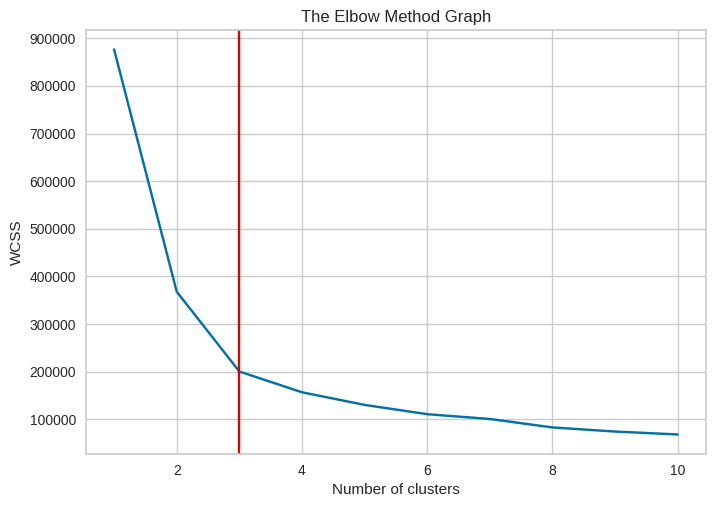

In [29]:
# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Identificador', 'Edad', 'Nacionalidad', 'Comuna',
                 'Ubicación', 'Local', 'Segmento', 'Experiencia']

filtered_cols = [col for col in dataset_normalized.columns
                 if col not in excluded_cols]

selected_data = dataset_normalized[filtered_cols].copy(deep=True)
kmeans = manual_elbow(selected_data)

# Plot the elbow graph
plt.plot(kmeans['df'].index.to_list(), kmeans['df']['wcss'].to_list())
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Visual proximation to the number of clusters
plt.axvline(x=3, color='r', linestyle='-')

# Plotting
plt.show()

<h3>8.2. Cálculo Matemático del Óptimo</h3>

A continuación, se presenta una aproximación matemática al óptimo número de grupos a formarse en nuestro proceso de segmentación. Más información y detalle en el artículo de [Granville (2019)](https://www.datasciencecentral.com/how-to-automatically-determine-the-number-of-clusters-in-your-dat/).

In [30]:
# Copying our dataset to avoid future issues
df_optimal = kmeans['df'].copy(deep=True)

for i in range(df_optimal.shape[0]):
  index = df_optimal.index[i]

  if i > 0: # Avoiding first value for which there's no delta
    delta01 = df_optimal.loc[index-1, 'wcss'] - df_optimal.loc[index, 'wcss']
    df_optimal.loc[index, 'Delta 1'] = delta01

  if i > 1: # Avoiding second value for which there's no delta
    delta02 = df_optimal.loc[index-1, 'Delta 1'] - df_optimal.loc[index, 'Delta 1']
    df_optimal.loc[index, 'Delta 2'] = delta02

    # Strenght calculations and filters
    strenght = df_optimal.loc[index-1, 'Delta 2'] - df_optimal.loc[index, 'Delta 1']
    df_optimal.loc[index, 'Strenght'] = next(s if s > 1 else None
                                             for s in [strenght])

df_optimal['Relative Strenght'] = df_optimal['Strenght'] / df_optimal.index
df_optimal.set_index(keys='clusters', drop=True, inplace=True)

# Optimal k by strenght values
max_strenght = df_optimal['Relative Strenght'].max()
optimal_k = df_optimal[df_optimal['Relative Strenght']==max_strenght].index[0]

# Display of calculation tables
display(df_optimal)

print(f'\nEl número óptimo es de {optimal_k} clústers.')

,wcss,Delta 1,Delta 2,Strenght,Relative Strenght
clusters,,,,,
1,876423.21,NaN,NaN,NaN,NaN
2,367925.931313,508497.278687,NaN,NaN,NaN
3,200331.508176,167594.423137,340902.855550,NaN,NaN
4,156689.757555,43641.750621,123952.672516,297261.104929,74315.276232
5,130191.232343,26498.525212,17143.225410,97454.147304,19490.829461
6,110691.447209,19499.785134,6998.740078,NaN,NaN
7,100620.638586,10070.808623,9428.976511,NaN,NaN
8,82891.185789,17729.452797,-7658.644174,NaN,NaN
9,74213.076711,8678.109078,9051.343719,NaN,NaN



El número óptimo es de 4 clústers.


Lamentablemente, en este caso el resultado no es el esperado. Más que desalentar el uso de este método, considere este resultado como una motivación al uso de diversas aproximaciones al número correcto de clústeres. Esto explica la interrogante frecuente del por qué utilizar métodos no-jerárquicos, si ya concluimos con el modelo del punto 7, por ejemplo.

<h3>8.3. Definición Automática del Número de Clústers</h3>

Una de las bondades de utilizar Python frente a otras herramientas para hacer estadísticas, es el gran número de contribuidores que trabajan constantemente para simplificar los métodos y funciones más utilizados en sus respectivas áreas de estudio. Así, la librería <code>yellowbrick</code> nos ofrece una alternativa sencilla para la determinación del número de clústers mediante el método del codo.

Se recomienda utilizar este enfoque a futuro, aunque para el ejercicio propuesto se pide desarrollar el algoritmo mediante la estrategia anterior, pudiéndose corroborar los resultados con este enfoque.

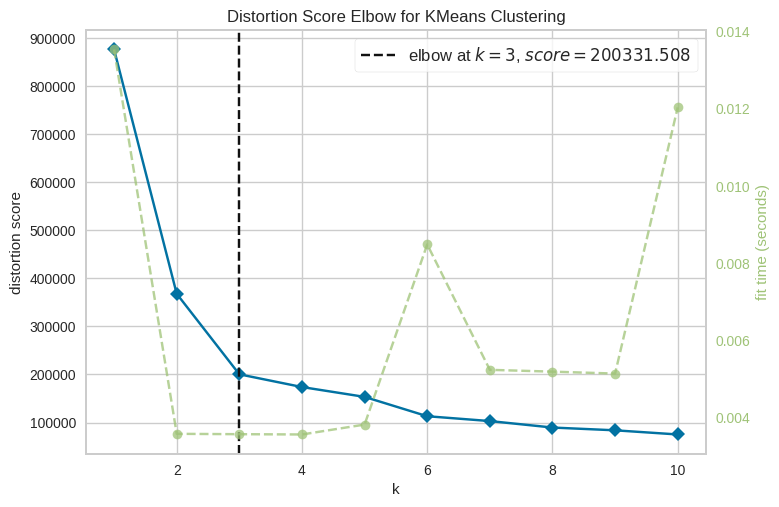

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, n_init='auto', random_state=5),
                 k=(1, 11))

In [31]:
  # UMétodo rápido para determinar el número de clústers
kelbow_visualizer(KMeans(random_state=5, n_init='auto'),
                  selected_data, k=(1,11))

Gracias a yellowbrick, y por la coincidencia de los resultados de las aproximaciones a la cantidad de clústeres de ambos modelos, podemos tranquilamente afirmar que estamos en presencia de tres segmentos.

<h3>8.4. Visualización de los Segmentos Creados</h3>

Este paso no es realmente necesario, pero al igual que en el caso jerárquico, nos permite monitorear el rendimiento de los algoritmos aplicados en la clasificación realizada. Así, el objetivo es determinar visualmente si los clústers creados se condicen con la observación inicial y los resultados esperados.

Text(0.5, 1.0, 'Labeled Customer Data')

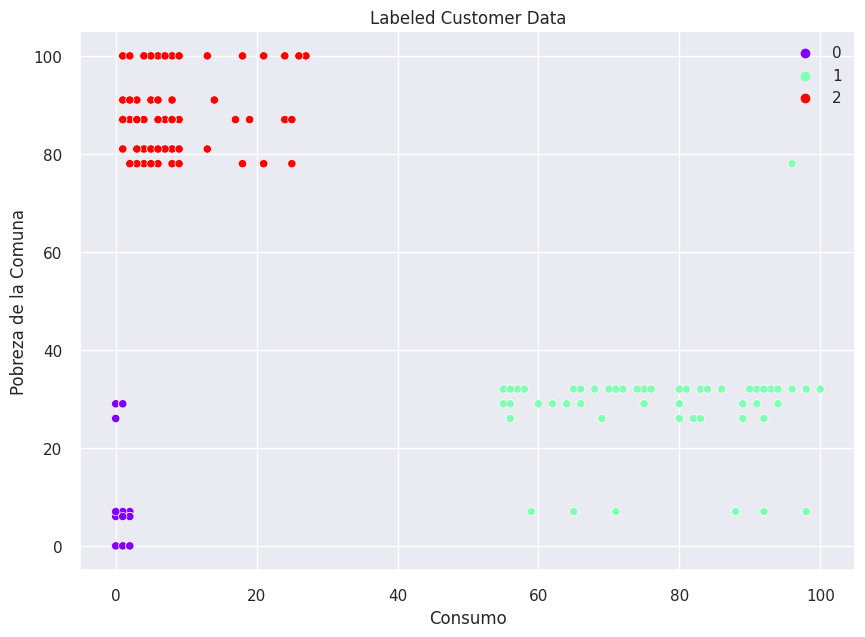

In [32]:
# Final clustering model
clustering_model = kmeans['dict'][3]

# Accessing vars of the clustering object
data_labels_v2 = clustering_model.labels_

# Visualization of our graph
sns.set(rc={'figure.figsize':(10, 7)})
sns.scatterplot(x='Consumo', y='Pobreza de la Comuna', data=selected_data,
                palette="rainbow", hue=data_labels_v2)\
                .set_title('Labeled Customer Data')

<h3>8.5. Asignación de los Segmentos a la Muestra</h3>

Por último, agregamos una columna a nuestro dataset, cuyo contenido viene dado por las operaciones previas y permite asignar el grupo correcto a cada individuo. Al contar con los DataFrames de uno y otro método, podremos determinar la efectividad de ambos modelos para reconocer cada segmento, además de analizar las diferencias entre ambos.

In [33]:
# Copying our dataset to avoid future issues
dataset_segmented_v2 = dataset_corregido.copy(deep=True)

# Adding clusters and reverting values from numeric
segments = [f'cluster_{group + 1:02d}' for group in data_labels_v2]
dataset_segmented_v2.insert(loc=1, column='segment', value=segments)

dict_mappers = {'Sexo': mapper_sex, 'Nacionalidad': mapper_nationality,
                'Nivel Educacional': mapper_education,
                'Ubicación': mapper_ubicacion, 'Comuna': mapper_city,
                'Local': mapper_local, 'Experiencia': mapper_experience}

for col, mapper in dict_mappers.items():
  mapper_inv = {v: k for k, v in mapper.items()}
  dataset_segmented_v2[col] = dataset_segmented_v2[col].replace(mapper_inv)

dataset_segmented_v2.sort_values(by=['segment', 'Identificador'], inplace=True)
dataset_segmented_v2

,Identificador,segment,Sexo,Edad,Nacionalidad,Nivel Educacional,Ubicación,Comuna,Pobreza de la Comuna,Local,Frecuencia,Consumo,Experiencia
152,15,cluster_01,Masculino,39,Chilena,Postgrado,Nororiente,Lo Barnechea,0.028,Los Trapenses,7,19789,Extremadamente insatisfecho
154,19,cluster_01,Masculino,16,Chilena,Educación primaria,Nororiente,Ñuñoa,0.107,Manquehue Norte,5,19635,Algo insatisfecho
155,24,cluster_01,Masculino,26,Chilena,Educación universitaria,Nororiente,Lo Barnechea,0.028,Los Trapenses,3,20154,Algo insatisfecho
157,26,cluster_01,Masculino,24,Alemana,Educación técnica,Nororiente,Vitacura,0.046,Manquehue Norte,8,17646,Extremadamente insatisfecho
159,31,cluster_01,Masculino,29,Chilena,Educación universitaria,Nororiente,Ñuñoa,0.107,Manquehue Norte,4,25123,Extremadamente insatisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,192,cluster_03,Femenino,55,Peruana,Educación secundaria,Sur,San Ramón,0.295,Los Trapenses,10,144325,Ni satisfecho ni insatisfecho
147,194,cluster_03,Femenino,46,Chilena,Educación secundaria,Sur,La Granja,0.245,Manquehue Norte,4,49926,Algo insatisfecho
148,195,cluster_03,Femenino,33,Chilena,Educación secundaria,Sur,La Granja,0.245,Los Trapenses,3,43853,Extremadamente insatisfecho
150,197,cluster_03,Femenino,22,Peruana,Educación secundaria,Suroriente,Puente Alto,0.271,Los Trapenses,10,29148,Extremadamente insatisfecho


<h2>9. Definición de Perfiles y Buyer Personas</h2>

Generar perfiles implica generar una tipología o descripción de los consumidores que conformarán el o los mercados objetivos seleccionados. Se basan en las características compartidas por las personas de un segmento y, cuando se expresan como grupo, al que se le asigna un nombre genérico, o en la “persona” de un individuo tipo que podemos inventar para efectos del ejercicio en cuestión, dan lugar al concepto de buyer persona. Idealmente, se debiera incluir una descripción, motivaciones, y el rol que la marca podría llevar a cabo en la forma de satisfacer sus necesidades.

<h3>9.1. Comparación de los Resultados</h3>

A continuación, revisaremos si se encontraron diferencias en los segmentos definidos por ambos modelos. Para esto, utilizaremos una función nativa de Pandas, con la que veremos las filas que difieren entre las tablas.

In [34]:
# If needed, we adjust for the segments' number
mapper_segments = {'cluster_01': 'cluster_03', 'cluster_02': 'cluster_01',
                   'cluster_03': 'cluster_02'}

dataset_segmented_v2['segment'] = dataset_segmented_v2['segment'].replace(
    mapper_segments)

dataset_segmented_v2.sort_values(by=['segment', 'Identificador'], inplace=True)

df_diff = dataset_segmented_v1.compare(dataset_segmented_v2)
print(f'Se encontraron {df_diff.shape[0]} filas distintas entre las tablas...')

Se encontraron 0 filas distintas entre las tablas...


De encontrarse diferencias entre los modelos, y si son relativamente pocas, se recomienda filtrarlas y analizar luego de revisar la estadística descriptiva de cada segmento a cuál debieran pertenecer. Dado que en este caso ambas tablas son iguales, a continuación se definirá el dataset final tomando la primera tabla como referencia:

In [35]:
# Copying our dataset to avoid future issues
dataset_segmented = dataset_corregido.copy(deep=True)

# Adding clusters and reverting values from numeric
segments = [f'cluster_{group + 1:02d}' for group in data_labels_v2]
dataset_segmented.insert(loc=1, column='segment', value=segments)

<h3>9.2. Estadística Descriptiva por Grupo</h3>

El siguiente bloque de código tiene por objetivo imprimir los promedio de cada columna para los distintos segmentos. Así, tras ejecutarlo veremos impresa esta información para cada grupo, pudiéndose construir fácilmente los perfiles a partir de esta información.

In [36]:
# Selecting columns to describe
excluded_cols = ['Identificador', 'Segmento']

filtered_cols = [col for col in dataset_segmented.columns
                 if col not in excluded_cols]

df_clustered = dataset_segmented[filtered_cols].copy(deep=True)

# Setting main variables to iterate over
dict_clusters = {}
list_dicts = []

for group in df_clustered['segment'].unique():
  # Filtering values for descriptive analysis to be done
  df_group = df_clustered[df_clustered['segment']==group].copy(deep=True)

  # Filling our cluster dictionary with the descriptive analysis
  dict_clusters[group] = df_group.describe(percentiles=[])

for cluster, values in dict_clusters.items():
  local_dict = {}

  # Future cluster index aggregation and addition of dict to list
  local_dict['cluster'] = cluster

  # Adding the number of individuals of each cluster
  group = int(re.search('(\d)+', cluster).group(1))
  size = df_clustered[df_clustered['segment']==group].shape[0]
  local_dict['size'] = size

  # Adding all the other values
  local_dict = {**local_dict, **dict(values.loc['mean', :])}
  list_dicts.append(local_dict)

df_archetypes = pd.DataFrame(list_dicts)
df_archetypes.set_index(keys='cluster', drop=True, inplace=True)
df_archetypes.sort_index(ascending=True, inplace=True)
df_archetypes.index.name = None

pd.set_option('display.float_format', lambda x: '%.1f' % x)
display(df_archetypes)

,size,Sexo,Edad,Nacionalidad,Nivel Educacional,Ubicación,Comuna,Pobreza de la Comuna,Local,Frecuencia,Consumo,Experiencia
cluster_01,0,1.8,31.1,1.7,2.8,1.0,8.0,0.1,1.2,5.1,22538.6,2.8
cluster_02,0,1.8,34.1,0.7,2.7,3.0,6.5,0.1,0.4,16.2,386655.6,3.1
cluster_03,0,1.0,41.7,1.7,1.1,2.7,2.9,0.3,1.4,6.4,55113.8,2.8


Es mucho lo que podemos determinar a partir de una información tan básica como las medias para cada variable observada de los grupos. A continuación, analizaremos variable por variable los resultados:

*   Sexo: observamos que en el clúster 3 dominan hegemónicamente las mujeres, mientras en el resto de los grupos distribuye más cargado a los hombres.
*   Edad: no parece presentar una diferencia significativa entre grupos a primera vista. Habría que correr un test de diferencia de medias para validar.
*   Nacionalidad: esta no es una variable a la que hayamos prestado especial atención, dada la nube de puntos que formaba en el pairplot.
*   Nivel Educacional: es significativamente más bajo para el clúster 3 que para los demás, a primera vista.
*   Ubicación o Comuna: omitidos por servir como llave para nuestro proxy de ingresos.
*   Pobreza de la Comuna: esta es nuevamente una variable que para el tercer segmento se dispara.
*   Local: no amerita análisis aún, pero será importante cuando veamos el detalle nominal y geográfico.
*   Frecuencia: en este caso, es el clúster 2 el que presenta una frecuencia que se escapa de la media entre grupos.
*   Consumo: Otra vez es el clúster 2 el que destaca, señalando una visita más frecuente y para un consumo no doméstico.

Con estas nociones claras, podemos aventurar algunas hipótesis que validaremos contra los datos nominales y nuestro conocimiento circunstancial.

<h3>9.3. Propuesta de Perfiles</h3>

Los perfiles que se presentan a continuación nacen de un trabajo iterativo y acabado de estudio de las variables nominales que, junto con el conocimiento circunstancial y de mercados, permite al equipo de Inteligencia de Mercados de Bimarc proponer una explicación a cada segmento.

1.   Se identificaron tres clústeres de consumidores. El primero, conocido como "foodies", se caracteriza por compras esporádicas de bajo monto, alto nivel educativo y adquisitivo, y una pasión por la comida y la gastronomía. Les gusta explorar nuevos sabores y restaurantes, compartiendo sus experiencias en línea.
2.   El segundo clúster, llamado "chefs", realiza compras frecuentes y de alto monto, a menudo relacionadas con necesidades culinarias profesionales. Tienen un alto nivel educativo y buscan ingredientes de alta calidad para crear platos excepcionales.
3.   El tercer segmento, "asesoras del hogar", realiza compras que no coinciden con sus ingresos estimados y a menudo en áreas residenciales diferentes. Se cree que trabajan en hogares de alto poder adquisitivo, desempeñando un papel clave en la gestión de las necesidades culinarias y domésticas.

<h3>9.4. Creación de Buyer Personas</h3>

A continuación se presenta una propuesta de buyer personas para cada uno de los segmentos identificados. Tome en consideración que para ello fue necesario investigar las características de los perfiles propuestos, cuestión de la que usted debiera dar cuenta en su informe.

---
**Buyer Persona para "Foodies"**

Nombre: Ana<br>
Edad: 25-35 años.<br>
Nivel educativo: Ingeniera Comercial.<br>

Características clave:
*   Apasionada por la comida y la gastronomía.
*   Le encanta probar nuevos sabores y explorar diferentes cocinas.
*   Activa en redes sociales y blogs culinarios donde comparte sus experiencias.
*   Tiene un ingreso estable y dispone de un presupuesto moderado para comer fuera.

Necesidades y deseos:
*   Busca restaurantes de alta calidad y experiencias culinarias únicas.
*   Siempre está en busca de ingredientes gourmet para cocinar en casa.
*   Valora la calidad y autenticidad de los alimentos.

---
**Buyer Persona para "Chefs"**

Nombre: Carlos<br>
Edad: 35-50 años.<br>
Nivel educativo: Graduado en Escuela de Chef Profesional.<br>

Características clave:
*   Chef profesional o dueño de restaurante.
*   Experimentado en la cocina y apasionado por la gastronomía.
*   Conocedor de ingredientes y técnicas culinarias avanzadas.
*   Tiene un ingreso moderado y busca calidad sobre cantidad.

Necesidades y deseos:
*   Busca proveedores de alimentos de alta gama para su restaurante.
*   Siempre está en búsqueda de ingredientes frescos y de calidad.
*   Valora la innovación en la cocina y está dispuesto a invertir en ingredientes excepcionales.

---
**Buyer Persona para "Asesoras del Hogar"**

Nombre: María<br>
Edad: 45-55 años.<br>
Nivel educativo: Educación secundaria.<br>

Características clave:

*   Trabaja como asesora del hogar en una zona residencial de alto poder adquisitivo.
*   Responsable de la gestión de la cocina y compras de reposición del el hogar donde trabaja.
*   Tiene un ingreso moderado y sus compras personales no las realiza en los locales de Bimarc Food Market.

Necesidades y deseos:

*   Busca eficiencia en las compras y productos de calidad para el hogar.
*   Valora la conveniencia y la durabilidad de los productos.
*   Su enfoque principal es mantener el hogar bien abastecido y satisfacer las necesidades culinarias de los residentes.

---

Estos buyer personas permiten a los equipos de marketing un trabajo más natural, al conectar los segmentos con un perfil y luego una idea con la que el interlocutor del informe se puede familiarizar de forma más humana y comprensible.

<h2>10. Repuesta a las Preguntas del Caso</h2>

1.   ¿Cuál es el perfil demográfico de los clientes de Bimarc Food Markets?<br>
<b>Respuesta:</b> Analizar sexo, edad, nacionalidad, nivel educacional y comuna de recidencia por segmento.

2.   ¿Cuáles son los patrones de compra de los clientes en Bimarc Food?<br>
<b>Respuesta:</b> Analizar los montos y frecuencia por segmento.

3.   ¿Cómo explicaría usted el bajo monto promedio de las boletas?<br>
<b>Respuesta:</b> Existe sólo un segmento que representa realmente a los trabajadores de la industria de los alimentos, y estos compran con alta frecuencia. Lo anterior, diluye el monto de las boletas y crea el efecto observado por Ricardo Bimarc.

3.   En su opinión, ¿estaría canibalizando Bimarc Food Markets la clientela de los supermercados tradicionales de la compañía?<br>
<b>Respuesta:</b> Sí, pero sólo en el segmento de asesoras del hogar.
